<a href="https://colab.research.google.com/github/caropeboka/iris-clustering/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load data
iris_df = pd.read_csv('drive/MyDrive/Dataset/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


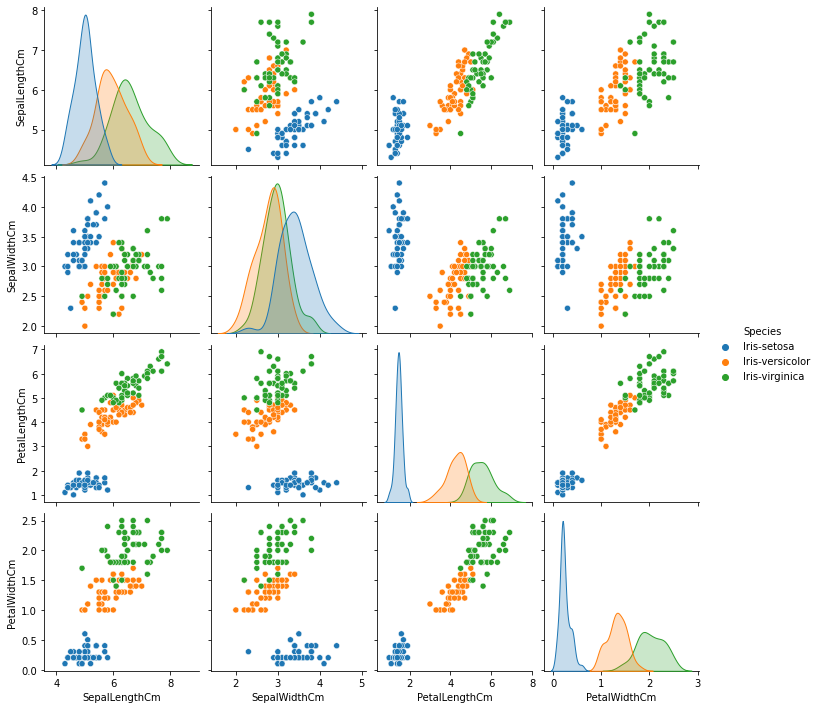

In [ ]:
#exploratory data analysis
iris_df.drop('Id', axis=1, inplace=True)
sns.pairplot(iris_df, hue='Species')

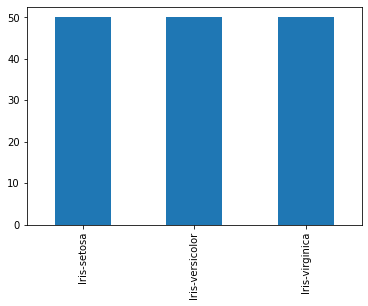

In [ ]:
iris_df['Species'].value_counts().plot(kind='bar')

In [ ]:
#split data for clustering
iris_df['Species'].replace('Iris-setosa', 0, inplace=True)
iris_df['Species'].replace('Iris-versicolor', 1, inplace=True)
iris_df['Species'].replace('Iris-virginica', 2, inplace=True)

In [ ]:
iris_features = iris_df.drop(['Species'], axis=1)
iris_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_target = iris_df['Species']
iris_target.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
#k-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaler.fit_transform(iris_features)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300).fit(iris_features)

In [ ]:
iris_df['k-means'] = kmeans.labels_
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k-means
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
pd.crosstab(iris_df['Species'], iris_df['k-means'])

k-means,0,1,2
Species,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [ ]:
#cluster evaluation by silhouette score

from sklearn.metrics import silhouette_samples, silhouette_score

iris_df['silhouette_kmeans'] = silhouette_samples(iris_features, iris_df['k-means'])
average_score = silhouette_score(iris_features, iris_df['k-means'])

print('K-means Silhouette Analysis Score :', average_score)
iris_df.head()

K-means Silhouette Analysis Score : 0.5525919445499757


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k-means,silhouette_kmeans
0,5.1,3.5,1.4,0.2,0,1,0.851573
1,4.9,3.0,1.4,0.2,0,1,0.817887
2,4.7,3.2,1.3,0.2,0,1,0.830087
3,4.6,3.1,1.5,0.2,0,1,0.806591
4,5.0,3.6,1.4,0.2,0,1,0.846996


In [ ]:
iris_df.groupby('k-means')['silhouette_kmeans'].mean()

k-means
0    0.417182
1    0.797630
2    0.451105
Name: silhouette_kmeans, dtype: float64

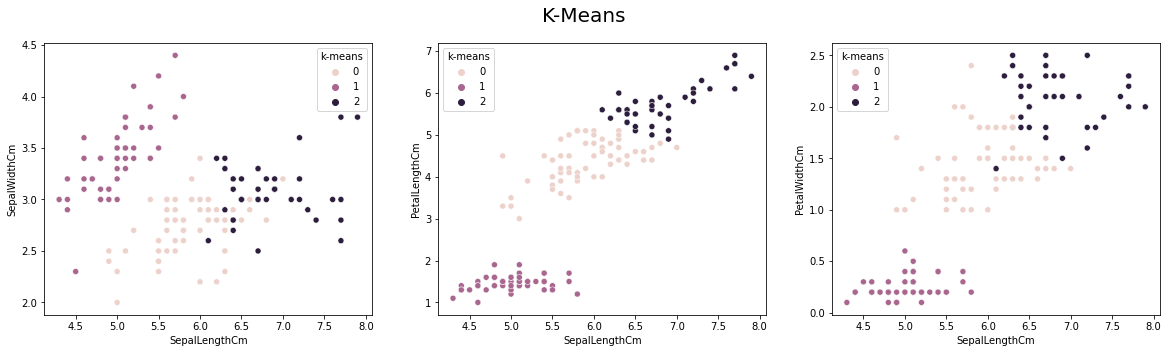

In [ ]:
#k-Means result
plt.figure(figsize=(20, 5))

plt.suptitle('K-Means', fontsize=20)

plt.subplot(1, 3, 1)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,1], hue=iris_df['k-means'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,2], hue=iris_df['k-means'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,3], hue=iris_df['k-means'])

In [ ]:
#dbscan
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean').fit_predict(iris_features)

iris_df['dbscan'] = dbscan
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k-means,silhouette_kmeans,dbscan
0,5.1,3.5,1.4,0.2,0,1,0.851573,0
1,4.9,3.0,1.4,0.2,0,1,0.817887,0
2,4.7,3.2,1.3,0.2,0,1,0.830087,0
3,4.6,3.1,1.5,0.2,0,1,0.806591,0
4,5.0,3.6,1.4,0.2,0,1,0.846996,0


In [ ]:
pd.crosstab(iris_df['Species'], iris_df['dbscan'])

dbscan,-1,0,1
Species,,,
0,1,49,0
1,4,0,46
2,8,0,42


In [ ]:
#cluster evaluation by silhouette score
iris_df['silhouette_dbscan'] = silhouette_samples(iris_features, iris_df['dbscan'])
average_score = silhouette_score(iris_features, iris_df['dbscan'])

print('DBSCAN Silhouette Analysis Score :', average_score)
iris_df.head()

DBSCAN Silhouette Analysis Score : 0.5419178830436095


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k-means,silhouette_kmeans,dbscan,silhouette_dbscan
0,5.1,3.5,1.4,0.2,0,1,0.851573,0,0.875929
1,4.9,3.0,1.4,0.2,0,1,0.817887,0,0.844998
2,4.7,3.2,1.3,0.2,0,1,0.830087,0,0.854948
3,4.6,3.1,1.5,0.2,0,1,0.806591,0,0.835301
4,5.0,3.6,1.4,0.2,0,1,0.846996,0,0.871778


In [ ]:
iris_df.groupby('dbscan')['silhouette_dbscan'].mean()

dbscan
-1   -0.245385
 0    0.831108
 1    0.497198
Name: silhouette_dbscan, dtype: float64

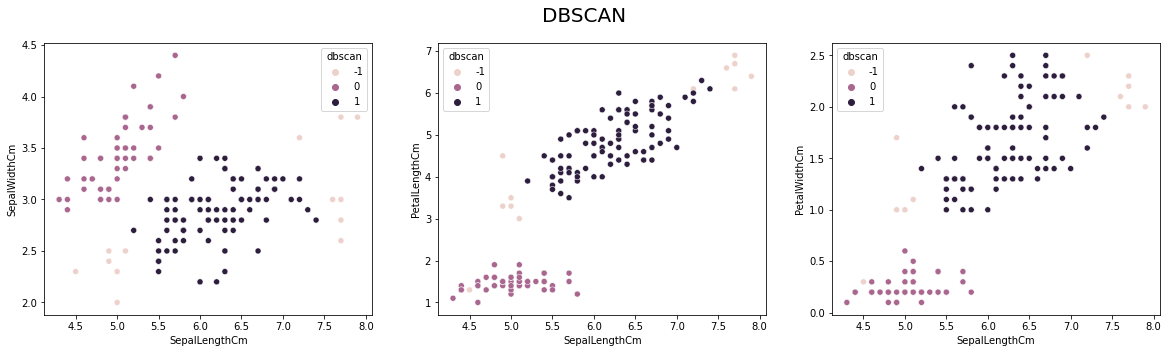

In [ ]:
#dbscan result

plt.figure(figsize=(20, 5))

plt.suptitle('DBSCAN', fontsize=20)

plt.subplot(1, 3, 1)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,1], hue=iris_df['dbscan'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,2], hue=iris_df['dbscan'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,3], hue=iris_df['dbscan'])

In [ ]:
#Unsupervised learning is a type of algorithm that learns patterns from
#untagged data. The hope is that through mimicry, which is an important mode of
#learning in people, the machine is forced to build a compact internal
#representation of its world and then generate imaginative content from it. In
#contrast to supervised learning where data is tagged by an expert, e.g. as a
#"ball" or "fish", unsupervised methods exhibit self-organization that captures
#patterns as probability densities or a combination of neural feature
#preferences. The other levels in the supervision spectrum are reinforcement
#learning where the machine is given only a numerical performance score as
#guidance, and semi-supervised learning where a smaller portion of the data is
#tagged. 